In [33]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
name=[]
price=[]
rating=[]
Previous_price=[]


In [34]:
for i in range(1,50):
    url='https://www.flipkart.com/search?q=phone+under+25000&as=on&as-show=on&otracker=AS_Query_OrganicAutoSuggest_8_11_na_na_na&otracker1=AS_Query_OrganicAutoSuggest_8_11_na_na_na&as-pos=8&as-type=RECENT&suggestionId=phone+under+25000&requestId=48618e69-34f8-4a53-bd3d-8df60f75ab1c&as-backfill=on&page='+str(i)
    data=requests.get(url)
    soup =BeautifulSoup(data.text,'lxml')
    find_price=soup.find('div',class_="_1YokD2 _3Mn1Gg")
    # find2_name=find_price.find_all('a',class_="IRpwTa")
    Rating=find_price.find_all('div',class_="_3LWZlK")
    find_name=find_price.find_all('div',class_="_4rR01T")
    Price=find_price.find_all('div',class_="_30jeq3 _1_WHN1")
    Previous_Price=find_price.find_all('div',class_="_3I9_wc _27UcVY")
    
    
    for i in find_name:
        name.append(i.text)


    
    for i in Price:
        price.append(i.text)   

    
    for i in Rating:
        rating.append(i.text)
        
    for i in Previous_Price:
        Previous_price.append(i.text)
        
    
    

    

In [48]:
price


['₹20,499',
 '₹23,999',
 '₹22,999',
 '₹24,999',
 '₹22,999',
 '₹23,999',
 '₹24,999',
 '₹21,499',
 '₹22,999',
 '₹24,999',
 '₹18,499',
 '₹24,999',
 '₹24,999',
 '₹24,999',
 '₹22,999',
 '₹22,999',
 '₹20,499',
 '₹24,999',
 '₹24,999',
 '₹24,999',
 '₹24,999',
 '₹21,081',
 '₹22,999',
 '₹24,999',
 '₹24,999',
 '₹24,999',
 '₹22,999',
 '₹19,990',
 '₹24,999',
 '₹24,999',
 '₹20,999',
 '₹24,690',
 '₹22,699',
 '₹24,999',
 '₹18,499',
 '₹24,999',
 '₹20,359',
 '₹23,989',
 '₹20,999',
 '₹24,879',
 '₹23,999',
 '₹22,999',
 '₹22,999',
 '₹23,770',
 '₹20,375',
 '₹24,999',
 '₹24,999',
 '₹24,999',
 '₹21,999',
 '₹24,999',
 '₹20,999',
 '₹21,989',
 '₹22,999',
 '₹23,890',
 '₹24,999',
 '₹20,499',
 '₹24,498',
 '₹20,900',
 '₹23,990',
 '₹23,999',
 '₹20,499',
 '₹24,990',
 '₹21,999',
 '₹18,999',
 '₹23,990',
 '₹24,699',
 '₹22,999',
 '₹20,999',
 '₹23,999',
 '₹24,999',
 '₹24,999',
 '₹27,990',
 '₹27,990',
 '₹24,999',
 '₹24,999',
 '₹23,999',
 '₹23,999',
 '₹24,999',
 '₹24,999',
 '₹20,880',
 '₹24,999',
 '₹21,990',
 '₹21,990',
 '₹2

In [43]:
df1=pd.DataFrame({"Name":name,"Price":price})
# len(price)
# # len(name)
# df2=pd.DataFrame({"Rating":rating})
df2=pd.DataFrame({"Rating":rating})
df3=pd.DataFrame({"Previous_Price":Previous_price})




In [ ]:
df = pd.concat([df1, df2, df3], axis=1, join='inner')

# I need to concatenate because of missing ratings in the list of flipkart review 

In [41]:
# df.to_csv('flipkart_final.csv')
df.to_csv("flipkart_analyis.csv")

In [31]:
import pandas as pd
df=pd.read_csv("D:/New Project flpkrt/flipkart eda analysis csv.csv")
df.head()

,Name,Model,ROM,Current_Price,Rating,List_Price,Discount_IN_INR,Discount_IN_PER,Colour
0,REDMI,Note 12 Pro 5G,128,24999,4.3,27999,3000,11,blue
1,REDMI,Note 12 Pro 5G,128,24999,4.3,27999,3000,11,black
2,REDMI,Note 12 Pro 5G,128,24999,4.3,27999,3000,11,pink
3,SAMSUNG,Galaxy A23 5G,128,22999,4.3,28990,5991,21,grey
4,SAMSUNG,Galaxy A23 5G,128,22999,4.3,28990,5991,21,violet


In [3]:
df.isnull().sum()/len(df. index)*100      # counting null values in %

Name               0.000000
Model              3.074866
ROM                0.000000
Current_Price      0.000000
Rating             0.000000
List_Price         0.000000
Discount_IN_INR    0.000000
Discount_IN_PER    0.000000
Colour             0.000000
dtype: float64

In [ ]:
# In model coloumn we have less then 5% null value that does not much important for our analysis 
# so we have to remove those rows for better analysis.

In [32]:
df=df.dropna() 

In [3]:
df.isnull().sum()/len(df. index)*100 

Name               0.0
Model              0.0
ROM                0.0
Current_Price      0.0
Rating             0.0
List_Price         0.0
Discount_IN_INR    0.0
Discount_IN_PER    0.0
Colour             0.0
dtype: float64

<AxesSubplot: >

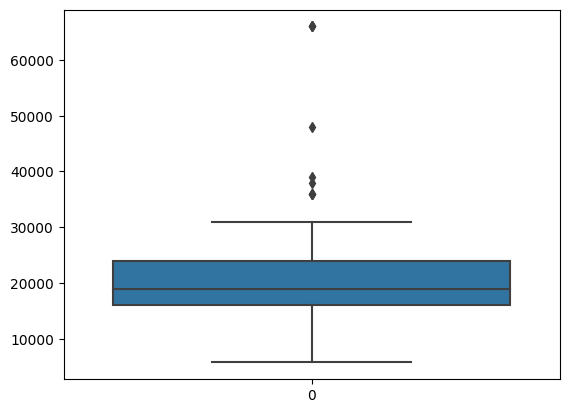

In [27]:
# Detecting outliers
sns.boxplot(df['Current_Price'])

In [28]:
# some outlier can be seen in box plot
df.shape # shape before removing outliers

(725, 9)

In [29]:
# IQR
Q1 = np.percentile(df['Current_Price'], 25)

Q3 = np.percentile(df['Current_Price'], 75)
IQR = Q3 - Q1

# Above Upper bound
upper=Q3+1.5*IQR
#Below Lower bound
lower=Q1-1.5*IQR

# Removing outliers
df=df[(df['Current_Price']>lower)&(df['Current_Price']<upper)]
df.shape # shape after removing outliers


(716, 9)

<AxesSubplot: >

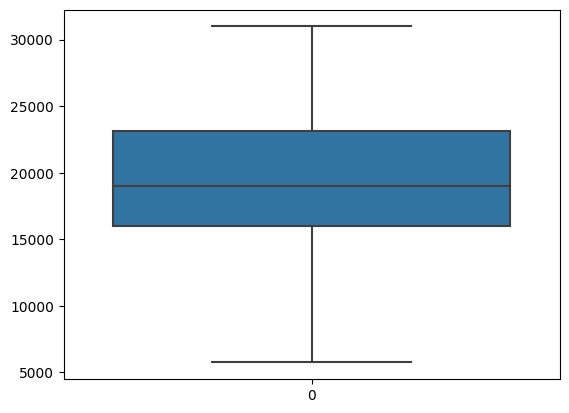

In [30]:
# checking for outliers
sns.boxplot(df['Current_Price'])

In [33]:
# all looks great now we can start our EDA

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [81]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 725 entries, 0 to 747
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             725 non-null    object 
 1   Model            725 non-null    object 
 2   ROM              725 non-null    int64  
 3   Current_Price    725 non-null    int64  
 4   Rating           725 non-null    float64
 5   List_Price       725 non-null    int64  
 6   Discount_IN_INR  725 non-null    int64  
 7   Discount_IN_PER  725 non-null    int64  
 8   Colour           725 non-null    object 
dtypes: float64(1), int64(5), object(3)
memory usage: 56.6+ KB


In [82]:
df.describe()

,ROM,Current_Price,Rating,List_Price,Discount_IN_INR,Discount_IN_PER
count,725.000000,725.000000,725.000000,725.000000,725.000000,725.000000
mean,120.143448,20019.531034,4.298621,22371.928276,9430.077241,69.702069
std,46.976912,6125.007510,0.150957,12929.474092,10103.836554,131.222038
min,32.000000,5749.000000,3.500000,999.000000,0.000000,0.000000
25%,128.000000,16000.000000,4.200000,15999.000000,4009.000000,19.000000
50%,128.000000,18990.000000,4.300000,20135.000000,9333.000000,41.000000
75%,128.000000,23990.000000,4.400000,25999.000000,9333.000000,62.000000
max,256.000000,65999.000000,4.700000,89900.000000,92151.000000,934.000000


In [83]:
df.nunique()

Name                15
Model              246
ROM                  4
Current_Price      195
Rating              13
List_Price         116
Discount_IN_INR    223
Discount_IN_PER    112
Colour              13
dtype: int64

In [4]:
# Maximum current price of each brand
p=df[['Current_Price','Name','Model']].groupby('Name').max()
p

,Current_Price,Model
Name,,
Apple,65999,iPhone 14
Google,28999,Pixel 6a
IQOO,29999,Z6 Pro 5G- 6GB
Infinix,19999,Zero 5G 2023 TURBO
Lenovo,38999,iPhone SE
MOTOROLA,29999,g82 5G
Mi,47999,W41 Pro
Nokia,35999,Zenfone Max Pro M1
OPPO,29999,Reno8T 5G


Apple phones are most expensive


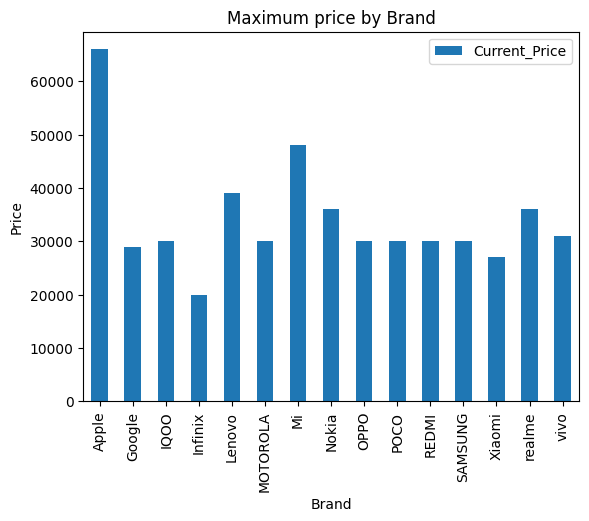

In [43]:
# plot
p.plot(kind='bar')
plt.xlabel("Brand")
plt.ylabel("Price")
plt.title("Maximum price by Brand")
print('Apple phones are most expensive')

In [90]:
# Total reviews of all phones
df['Name'].count()

725

In [86]:
# Total unique Brands
df['Name'].nunique()

15

In [12]:
# Name of all Brands
df['Name'].unique()

array(['REDMI', 'SAMSUNG', 'vivo', 'realme', 'Xiaomi', 'OPPO', 'Mi',
       'Nokia', 'MOTOROLA', 'Infinix', 'POCO', 'IQOO', 'Lenovo', 'Apple',
       'Google'], dtype=object)

In [59]:
#Total unique Models
df['Model'].nunique()

246

In [62]:
# Total reviews of each brand
c=df['Name'].value_counts()
c

REDMI       131
realme      101
vivo         93
SAMSUNG      85
OPPO         85
POCO         52
Infinix      36
MOTOROLA     32
Mi           26
IQOO         23
Xiaomi       20
Nokia        18
Lenovo       18
Apple         3
Google        2
Name: Name, dtype: int64

Text(0.5, 1.0, 'Count of Reviews by Brand')

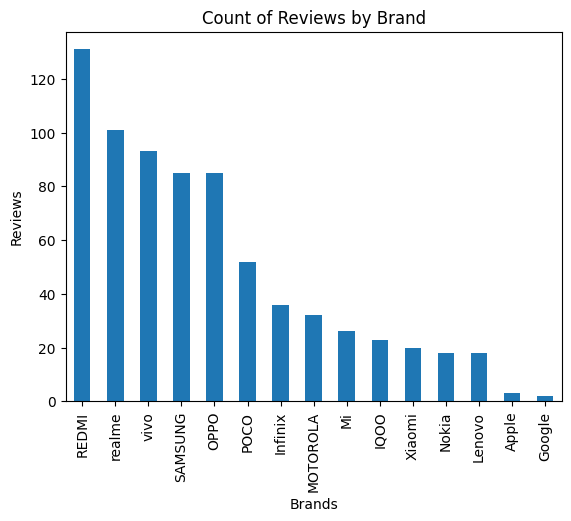

In [9]:
# plot
c.plot(kind='bar')
plt.xlabel("Brands")
plt.ylabel("Reviews")
plt.title("Count of Reviews by Brand")
print('Redmi phones got maximum reviews and Google is least')

In [44]:
# max Rating of each Brand
df[['Name','Rating']].groupby('Name').max()

,Rating
Name,
Apple,4.333333
Google,4.500000
IQOO,4.330435
Infinix,4.286111
Lenovo,4.350000
MOTOROLA,4.262500
Mi,4.288462
Nokia,4.261111
OPPO,4.295294


In [45]:
# average Rating of each Brand
df[['Name','Rating']].groupby('Name').mean()

,Rating
Name,
Apple,4.333333
Google,4.500000
IQOO,4.330435
Infinix,4.286111
Lenovo,4.350000
MOTOROLA,4.262500
Mi,4.288462
Nokia,4.261111
OPPO,4.295294


In [55]:
# Highest Rated brands                                     
df[df['Rating']==df['Rating'].max()]

,Name,Model,ROM,Current_Price,Rating,List_Price,Discount_IN_INR,Discount_IN_PER,Colour
412,MOTOROLA,Edge 20 5G,128,20999,4.7,24999,4000,16,Pearl
413,vivo,Y565G,128,20140,4.7,22999,2859,12,violet
505,REDMI,K20 Pro,128,28999,4.7,89900,60901,68,red
508,SAMSUNG,Galaxy F23 5G,128,14999,4.7,1499,9333,623,violet
509,Infinix,Hot 20 5G,128,13499,4.7,15999,2500,16,blue
510,vivo,T1X,128,12999,4.7,6799,9333,137,black
523,OPPO,F5,64,24990,4.7,31000,6010,19,red
721,Infinix,Smart 6 HD,32,5799,4.7,11999,6200,52,black


In [177]:
# Most expensive model                                         
df[['Name','Model','Current_Price']][df['Current_Price']==df['Current_Price'].max()]
# Apple models are most expensive

,Name,Model,Current_Price
269,Apple,iPhone 14,65999
381,Apple,iPhone 14,65999
384,Apple,iPhone 14,65999


In [145]:
# Most Expensive colour                                      
df[['Colour','Current_Price','Name','Rating']][df['Current_Price']==df['Current_Price'].max()]
# Pink,Blue,Black colours are most expensive

,Colour,Current_Price,Name,Rating
269,pink,65999,Apple,4.2
381,blue,65999,Apple,4.4
384,black,65999,Apple,4.4


In [41]:
# Most rated colour
df[['Colour','Current_Price','Name','Rating']][df['Rating']==df['Rating'].max()]
# These colours are high in rating.

,Colour,Current_Price,Name,Rating
412,Pearl,20999,MOTOROLA,4.7
413,violet,20140,vivo,4.7
505,red,28999,REDMI,4.7
508,violet,14999,SAMSUNG,4.7
509,blue,13499,Infinix,4.7
510,black,12999,vivo,4.7
523,red,24990,OPPO,4.7
721,black,5799,Infinix,4.7


In [13]:
# Total reviews of each colour
c=df['Colour'].value_counts()
c

black     209
blue      200
violet     78
white      65
Gold       50
grey       36
red        32
pink       25
yellow     16
Brown       5
Pearl       4
sky         3
green       2
Name: Colour, dtype: int64

Black colour has highest reviews


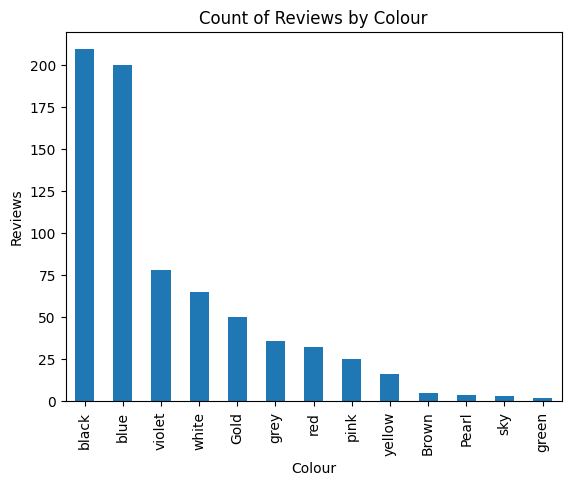

In [35]:
# plot
c.plot(kind='bar')
plt.xlabel("Colour")
plt.ylabel("Reviews")
plt.title("Count of Reviews by Colour")
print('Black colour has highest reviews')

Green is good in average rated colour


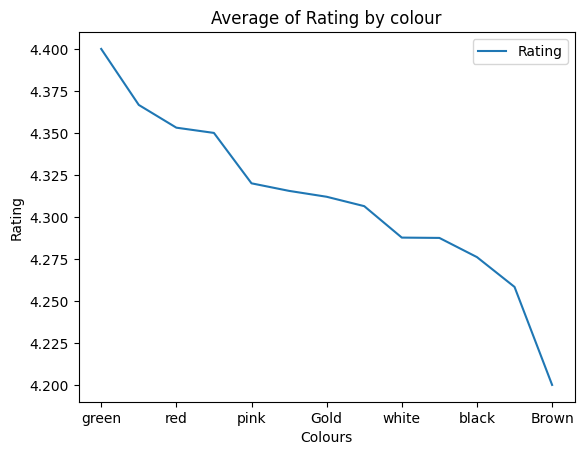

In [61]:
# avg rating of each colour                      
g=df[['Colour','Rating']].groupby('Colour').mean()        
g.sort_values(by=['Rating'],ascending=False).plot()
plt.xlabel("Colours")
plt.ylabel("Rating")
plt.title("Average of Rating by colour")
print('Green is good in average rated colour')

In [24]:
# avg price,Rating of each internal memory
df.groupby('ROM').mean()
print('All the ROM having good Rating')

C:\Users\kunal vashistha\AppData\Local\Temp\ipykernel_10912\3047735331.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby('ROM').mean()


,Current_Price,Rating,List_Price,Discount_IN_INR,Discount_IN_PER
ROM,,,,,
32,14708.312500,4.325000,24647.937500,16719.250000,88.250000
64,16372.454545,4.320000,22114.290909,12270.096970,101.127273
128,20801.295547,4.291498,22768.287449,8134.412955,52.279352
256,26030.640000,4.290000,18577.780000,10526.640000,132.200000


People like 128 & 64 GB ROM more as compare to 256 or 32 GB


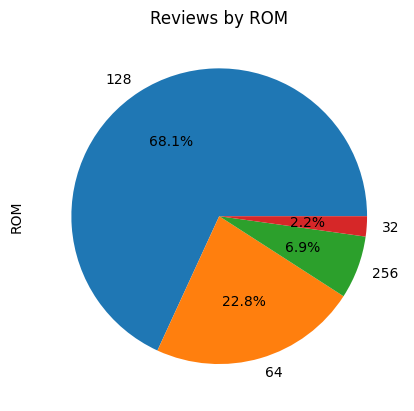

In [34]:
# most reviewed ROM
df['ROM'].value_counts().plot(kind='pie', y='Rating',autopct='%1.1f%%')
plt.title("Reviews by ROM")
print('People like 128 & 64 GB ROM more as compare to 256 or 32 GB')

In [64]:
# budget phone : phone of price under 23000 with 4.4 rating ,black in colour
df[df['Current_Price']<23000][df['Rating']>4.4][df['Colour']=='black']

C:\Users\kunal vashistha\AppData\Local\Temp\ipykernel_25384\2819809245.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df[df['Current_Price']<23000][df['Rating']>4.4][df['Colour']=='black']


,Name,Model,ROM,Current_Price,Rating,List_Price,Discount_IN_INR,Discount_IN_PER,Colour
392,vivo,Y56 5G,128,20499,4.5,24999,4500,18,black
414,vivo,Y565G,128,20999,4.5,25999,5000,19,black
426,realme,9 Pro 5G,128,18999,4.5,20999,2000,10,black
462,IQOO,Z6 44W,128,16380,4.5,29990,13610,45,black
477,OPPO,A53s 5G,128,17990,4.5,14999,9333,62,black
481,OPPO,F19s,128,19789,4.5,11999,9333,78,black
510,vivo,T1X,128,12999,4.7,6799,9333,137,black
582,REDMI,Note 6 Pro,64,15999,4.5,31999,16000,50,black
596,REDMI,Note 6 Pro,64,15999,4.5,31999,16000,50,black
619,REDMI,Note 7 Pro,64,16999,4.5,12999,9333,72,black


In [ ]:
# we scrap  phone reviews data from flipkart website using request,beautiful soup libraries
# use libraries like numpy,pandas,matplotlib
# value_counts(),sort_values(),groupby().aggregation,conditions based dataframes.
# pie chart,bar chart,box plot
# we found null values (removed) & outliers that are removed (by IQR method) for our further analysis.
# Google phones are highest in average rated phones (4.7)
# Apple iPhone 14	INR 65999 is the most expensive phone & got 3 reviews and good in average rating 4.3 
# Black & Blue are the most reviewed colours 209,200 / 716
# People like 128 & 64 GB ROM as compare to 256 or 32 GB
# redmi & realme are highest reviewed brands 131,101 /716 having avg rating rating 4.2 & 4.3
# The highest(4.7) rated brands are 8  (MOTOROLA,vivo,REDMI,SAMSUNG,Infinix,vivo,OPPO,Infinix)
# finally found 16 budget phones with good rating & black in colour.